In [1]:
import pathlib as pl

import pandas as pd

from pyprojroot import here

In [2]:
incubation_metadata_df = pd.read_pickle(here("./data/db/working/kaggle/incubation/02-incubation_w_metadata.pickle"))

In [3]:
incubation_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8786 entries, 0 to 8785
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pid                         8786 non-null   object 
 1   title_x                     8786 non-null   object 
 2   text_sent                   8786 non-null   object 
 3   incubation_sent             8786 non-null   object 
 4   incubationPeriod_sent       8786 non-null   object 
 5   incubationPeriod-days_sent  8786 non-null   object 
 6   cord_uid                    8786 non-null   object 
 7   sha                         8628 non-null   object 
 8   source_x                    8786 non-null   object 
 9   title_y                     8786 non-null   object 
 10  doi                         8743 non-null   object 
 11  pmcid                       8786 non-null   object 
 12  pubmed_id                   7674 non-null   float64
 13  license                     8786 

## Filter on date

In [4]:
incubation_metadata_df["publish_time_dt"] = pd.to_datetime(incubation_metadata_df["publish_time"], yearfirst=True)

earliest_date = pd.to_datetime("2020-01-01", yearfirst=True)
earliest_date

incubation_dt_filtered = incubation_metadata_df[(incubation_metadata_df["publish_time_dt"] >= earliest_date) & 
                                                (incubation_metadata_df["publish_time_dt"] <= pd.to_datetime("today")) # some dates are after today...
                                               ]
incubation_dt_filtered.shape
incubation_dt_filtered

print(f"number of unique pid's since {earliest_date}: {incubation_dt_filtered.pid.unique().shape}")


number of unique pid's since 2020-01-01 00:00:00: (547,)


#### These are dates that will be problematic in the future

In [5]:
with pd.option_context('display.min_rows', 50, 'display.max_columns', None, 'display.max_colwidth', -1):
    display(incubation_metadata_df
        [(incubation_metadata_df["publish_time_dt"] > pd.to_datetime("today"))]
        [["pid", "publish_time_dt", "title_x", "journal", "url",]]
        .sort_values("publish_time_dt")
        .reset_index(drop=True)
    )

,pid,publish_time_dt,title_x,journal,url
0,PMC7194684,2020-05-20,Influence of media composition on recombinant monoclonal IgA1 glycosylation analysed by lectin-based protein microarray and MALDI-MS,Journal of Biotechnology,NaN
1,PMC7127204,2020-05-30,UPLC-MS identification and anticomplement activity of the metabolites of Sophora tonkinensis flavonoids treated with human intestinal bacteria,Journal of Pharmaceutical and Biomedical Analysis,NaN
2,PMC7102525,2020-05-31,Effects of progressive muscle relaxation on anxiety and sleep quality in patients with COVID-19,Complementary Therapies in Clinical Practice,NaN
3,PMC7194575,2020-05-31,"Challenges of SARS-CoV-2 and lessons learnt from SARS in Guangdong Province, China",Journal of Clinical Virology,NaN
4,PMC7186548,2020-05-31,Infection par le SARS-CoV-2 chez les femmes enceintes : état des connaissances et proposition de prise en charge par CNGOF,Gynécologie Obstétrique Fertilité & Sénologie,NaN
5,PMC7180027,2020-05-31,Effective health communication – a key factor in fighting the COVID-19 pandemic,Patient Education and Counseling,NaN
6,PMC7165116,2020-05-31,Nonstructural protein 6 of porcine epidemic diarrhea virus induces autophagy to promote viral replication via the PI3K/Akt/mTOR axis,Veterinary Microbiology,NaN
7,PMC7156809,2020-05-31,Dermatology practices as vectors for COVID-19 transmission: A call for immediate cessation of nonemergent dermatology visits,Journal of the American Academy of Dermatology,NaN
8,PMC7198847,2020-05-31,Monitoring the COVID-19 epidemic in the context of widespread local transmission,The Lancet Respiratory Medicine,NaN
9,PMC7114663,2020-05-31,Foot and mouth disease virus undergoes non-progressive replication in mice peritoneal macrophages and induces M1 polarization,Virus Research,NaN


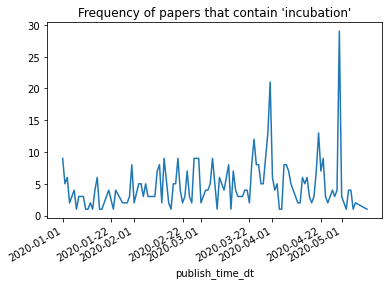

In [6]:
(incubation_dt_filtered
 .groupby(["publish_time_dt"])
 .size()
 .sort_index()
 .plot(title="Frequency of papers that contain 'incubation'")
)

## Explode sentences

In [7]:
explode_col = "incubationPeriod-days_sent"

explode_df = (incubation_dt_filtered
                  .rename(columns={"title_x": "title"})
                  [["pid", "title", "publish_time_dt", "incubationPeriod-days_sent", 'doi', 'url']]
                  .explode(explode_col)
                  .reset_index(drop=True)
                  .dropna()
             )

explode_df

,pid,title,publish_time_dt,incubationPeriod-days_sent,doi,url
7,PMC6962363,Infection Prevention Measures for Surgical Pro...,2020-01-15,"For MERS-exposed patients, surgical procedures...",10.1038/s41598-019-57216-x,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
8,PMC6962363,Infection Prevention Measures for Surgical Pro...,2020-01-15,"Moreover, we observed development of MERS afte...",10.1038/s41598-019-57216-x,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
28,PMC7007770,Evaluation of swine enteroids as in vitro mode...,2020-01-16,The incubation period for L. intracellularis i...,10.1093/jas/skaa011,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
63,PMC7037444,Does Wuhan Need to be in Lockdown during the C...,2020-02-05,Due to the incubation period of the 2019-nCoV ...,10.3390/ijerph17031002,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
78,PMC7049846,Demographic Variations of MERS-CoV Infection a...,2020-02-19,Studies have suggested an incubation period of...,10.1155/2020/9629747,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
...,...,...,...,...,...,...
640,PMC7199242,COVID-19: Review of Epidemiology and Potential...,2020-04-26,"Doctors and health-care practitioners, of lead...",10.15190/d.2020.5,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
641,PMC7199242,COVID-19: Review of Epidemiology and Potential...,2020-04-26,"Nevertheless, more recently, in a JAMA report ...",10.15190/d.2020.5,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
642,PMC7199242,COVID-19: Review of Epidemiology and Potential...,2020-04-26,It was calculated that the mean incubation per...,10.15190/d.2020.5,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...
643,PMC7199768,Endovascular Therapy for Patients With Acute I...,2020-05-04,In light of the median 5 to 6 day incubation p...,10.1161/strokeaha.120.029863,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...


In [8]:
print(f"Number of unique pids: {explode_df.pid.unique().shape}")

Number of unique pids: (125,)


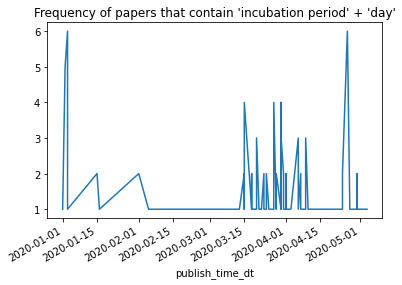

In [9]:
(explode_df
 .groupby(["pid", "publish_time_dt"])
 .size()
 .droplevel("pid")
 .sort_index()
 .plot(title="Frequency of papers that contain 'incubation period' + 'day'")
)

## Filter on covid19 related terms

In [10]:
filter_words_lower_regex = [
    r"covid\s?-?\s?19",
    r"sars-?cov-?2",
    r"ncov"
]
pattern = "|".join(filter_words_lower_regex)
pattern

'covid\\s?-?\\s?19|sars-?cov-?2|ncov'

In [11]:
matches_pattern = explode_df[explode_df[explode_col].str.lower().str.contains(pattern, regex=True)]

In [12]:
print(f"Number of covid sentence term matches: {len(matches_pattern)}")

Number of covid sentence term matches: 46


In [13]:
print(f"Number of papers: {matches_pattern.pid.unique().size}")

Number of papers: 44


## All the rows

In [14]:
with pd.option_context('display.min_rows', 50, 'display.max_columns', None, 'display.max_colwidth', -1):
    display(matches_pattern.reset_index(drop=True))

,pid,title,publish_time_dt,incubationPeriod-days_sent,doi,url
0,PMC7037444,Does Wuhan Need to be in Lockdown during the Chinese Lunar New Year?,2020-02-05,"Due to the incubation period of the 2019-nCoV at around 14 days, there might be another outbreak peaking around 6 February 2020, a result of potentially infected people leaving Wuhan before or on 23 January 2020 by private transportation means.",10.3390/ijerph17031002,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7037444/
1,PMC7087612,AI-Driven Tools for Coronavirus Outbreak: Need of Active Learning and Cross-Population Train/Test Models on Multitudinal/Multimodal Data,2020-03-18,"Based on the incubation period of illness for Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS) coronaviruses, as well as observational data from reports of travel-related COVID-19, CDC estimates that symptoms of COVID-19 occur within 2–14 days after exposure.",10.1007/s10916-020-01562-1,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7087612/
2,PMC7098028,COVID-19: what has been learned and to be learned about the novel coronavirus disease,2020-03-15,"The estimated mean incubation period of SARS-CoV-2 is 1-14 days, mostly 3-7 days based on a study of the first 425 cases in Wuhan 36.",10.7150/ijbs.45134,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7098028/
3,PMC7098030,SARS-CoV-2: an Emerging Coronavirus that Causes a Global Threat,2020-03-15,Analysis of 425 patients with confirmed COVID-19 showed that the incubation period is 3 to 7 days.,10.7150/ijbs.45053,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7098030/
4,PMC7112957,COVID-19 Pandemic: Public Health Implications in Nepal,2020-03-30,"The current evidence suggests that the incubation period after exposure to the COVID-19 virus is supposed to be within two weeks, and the median incubation period with symptomatic presentation appears around 5 days post-exposure [2-4].",10.3126/nje.v10i1.28269,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7112957/
5,PMC7113464,Advice on Standardized Diagnosis and Treatment for Spinal Diseases during the Coronavirus Disease 2019 Pandemic,2020-03-30,"The incubation period of COVID-19 is usually 3–7 days and no more than 14 days, while it can also last up to 24 days in rare cases.",10.31616/asj.2020.0122,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7113464/
6,PMC7132551,CT imaging changes of corona virus disease 2019(COVID-19): a multi-center study in Southwest China,2020-04-06,"Generally, the incubation period of COVID-19 ranges from 1 to 14 days, with most people developing symptoms between 3–7 days; however, the longest incubation period can reach 24 days [3].",10.1186/s12967-020-02324-w,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7132551/
7,PMC7133387,"Epidemiological, clinical and virological characteristics of 74 cases of coronavirus-infected disease 2019 (COVID-19) with gastrointestinal symptoms",2020-03-24,"Twenty-one patients with COVID-19 with GI symptoms and 195 without them had definite exposure times, with the median calculated incubation period as 4 days (IQR 3–7 days) and 5 days (IQR 3–8 days), respectively.",10.1136/gutjnl-2020-320926,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7133387/
8,PMC7138423,"A Comprehensive Literature Review on the Clinical Presentation, and Management of the Pandemic Coronavirus Disease 2019 (COVID-19)",2020-04-06,Clinical disease course of COVID-19\nThe official incubation period for SARS-CoV-2 is 2-14 days and therefore 14 days is the chosen cut-off for self-quarantine.,10.7759/cureus.7560,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7138423/
9,PMC7138423,"A Comprehensive Literature Review on the Clinical Presentation, and Management of the Pandemic Coronavirus Disease 2019 (COVID-19)",2020-04-06,(n = 1324) estimated that the mean incubation period is three days [95% CI: 2 to 7 days] and that in 95% of all COVID-19 patients developed illness onset within 10 days [20].,10.7759/cureus.7560,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7138423

In [15]:
pl.Path(here("./data/db/final/kaggle/incubation/", warn=False)).mkdir(parents=True, exist_ok=True)
matches_pattern.to_csv(here("./data/db/final/kaggle/incubation/03-incubation_period_day-covid_terms.tsv", warn=False), sep="\t")

## Attempt to parse out numbers text

This doesn't work yet, but there's few enough rows that the values could be hand parsed

In [16]:
pattern = (r'(\d+\.?\d+?)' # decimal digit
           r'\s?'
           r'[to]?'
           r'\s?'
           r'-?'
           r'\s?'
           r'(\d+\.?\d+?)'
           r'\s?'
           r'day[s]'
          )
pattern

'(\\d+\\.?\\d+?)\\s?[to]?\\s?-?\\s?(\\d+\\.?\\d+?)\\s?day[s]'

In [17]:
matches_pattern["incubationPeriod-days_sent"].str.extractall(pattern)

0     1
    match           
534 0      4.5   5.8
    1      8.2  15.6

In [18]:
with pd.option_context('display.min_rows', 50, 'display.max_columns', None, 'display.max_colwidth', -1):
    print(matches_pattern.loc[534])

pid                           PMC7179986                                                                                                                                                                                                                                      
title                         Brief Review on COVID-19: The 2020 Pandemic Caused by SARS-CoV-2                                                                                                                                                                                
publish_time_dt               2020-03-24 00:00:00                                                                                                                                                                                                                             
incubationPeriod-days_sent    To date, the median observed incubation period for SARS-CoV-2 appears to be 5.1 days (95% confidence interval [CI]: 4.5-5.8 days), with 97.5% of those who de